## Introduction

This project investigates key factors influencing car resale values, brand value retention, regional pricing variations, and customer satisfaction within the context of PakWheels.com. The study aims to provide actionable insights for car buyers, sellers, and market analysts in Pakistan

## Objectives

1. Identify the factors influencing used car resale values in Pakistan.
2. Analyze brand value retention and depreciation trends over time.
3. Explore regional variations in car prices and preferences.
4. Determine the drivers of customer satisfaction in vehicle reviews.


## Research Questions

1. **What Key Factors Drive Used Car Resale Values in Pakistan?**
   - Analyze the impact of mileage, age, brand, model, and engine specifications.
   - Correlate vehicle attributes with resale values.

2. **Do Certain Car Brands Retain Their Value Better Over Time?**
   - Compare depreciation rates across brands.
   - Evaluate the relationship between brand reputation and value retention.

3. **Is There a Regional Variation in Car Prices or Preferences in Pakistan?**
   - Explore regional differences in car types, brands, and pricing trends.

4. **What Drives Customer Satisfaction in Vehicle Reviews?**
   - Identify key satisfaction factors from reviews.
   - Build predictive models for overall satisfaction.


### Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from json import loads, dumps
from wordcloud import WordCloud
from datetime import datetime

## Dataset Overview + EDA

### Ads Dataset

#### Loading the Dataset

In [ ]:
ads_df = pd.read_csv(os.path.join('datasets', 'dataset_1.csv'), index_col=0)

# Dropping duplicates if any
ads_df.drop_duplicates()

# Displaying the first few rows to understand the structure of the data
ads_df.head(3)

,url,Featured,Vehicle,Location,Model,Vehicle Type,Mileage,Engine Type,Transmission,Features,Details,Price,Seller Details,Seller's Comments
Ad Ref,,,,,,,,,,,,,,
9307635,https://www.pakwheels.com/used-cars/mg-hs-2021...,1,MG HS Trophy 2021,"Bahria Town, Lahore Punjab",2021,Crossover,"31,500 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Punjab', 'Color': 'Pearl Wh...",PKR 66.5 lacs,"Syed Naqvi \nMember Since Oct 22, 2020",MG Hs 2021 model registered in 2022 Imported U...
9233999,https://www.pakwheels.com/used-cars/bmw-x1-201...,0,BMW X1 sDrive18i 2017,"Central Park Housing Scheme, Lahore Punjab",2017,Crossover,"70,000 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Islamabad', 'Color': 'Alpin...","PKR 68 lacs\n\nFinancing starts at PKR 98,662/...","M Adeel Jutt\nMember Since Apr 05, 2021",totally genuine low mileage all original docum...
9259914,https://www.pakwheels.com/used-cars/toyota-lan...,1,Toyota Land Cruiser ZX 2022,Islamabad Islamabad,2022,SUV,30 km,Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Un-Registered', 'Color': 'W...",PKR 7.35 crore,Dealer:\nAamir Shah,"LC 300 , Toyota Land Cruiser. Full house zer..."


#### Display basic information about the dataset

In [462]:
ads_df.dtypes

url                  object
Featured              int64
Vehicle              object
Location             object
Model                 int64
Vehicle Type         object
Mileage              object
Engine Type          object
Transmission         object
Features             object
Details              object
Price                object
Seller Details       object
Seller's Comments    object
dtype: object

#### Check for missing values

In [18]:
ads_df.isnull().sum()

url                  0
Featured             0
Vehicle              0
Location             0
Model                0
Vehicle Type         0
Mileage              0
Engine Type          0
Transmission         0
Features             0
Details              0
Price                0
Seller Details       0
Seller's Comments    0
dtype: int64

#### Summary statistics of numerical columns

In [19]:
ads_df.describe()

,Featured,Model
count,53784.000000,53784.000000
mean,0.161163,2013.583166
std,0.367685,7.665484
min,0.000000,1951.000000
25%,0.000000,2009.000000
50%,0.000000,2015.000000
75%,0.000000,2020.000000
max,1.000000,2024.000000


#### Check unique values for each column

In [25]:
for column in ads_df.columns:
    print(f"{column}: {ads_df[column].nunique()} unique values")

url: 53784 unique values
Featured: 2 unique values
Vehicle: 6010 unique values
Location: 2237 unique values
Model: 60 unique values
Vehicle Type: 22 unique values
Mileage: 7955 unique values
Engine Type: 6 unique values
Transmission: 2 unique values
Features: 4020 unique values
Details: 32355 unique values
Price: 4487 unique values
Seller Details: 44733 unique values
Seller's Comments: 51685 unique values


#### EDA on key columns

**a. Vehicle Type Distribution**

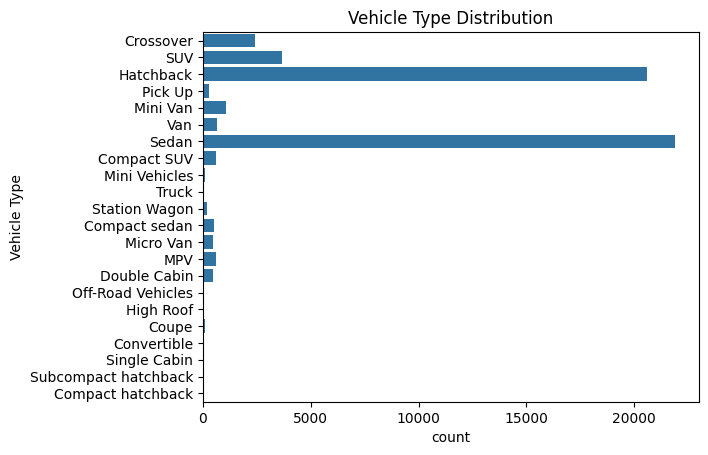

In [26]:
sns.countplot(y=ads_df['Vehicle Type'])
plt.title('Vehicle Type Distribution')
plt.show()

**b. Transmission Distribution**

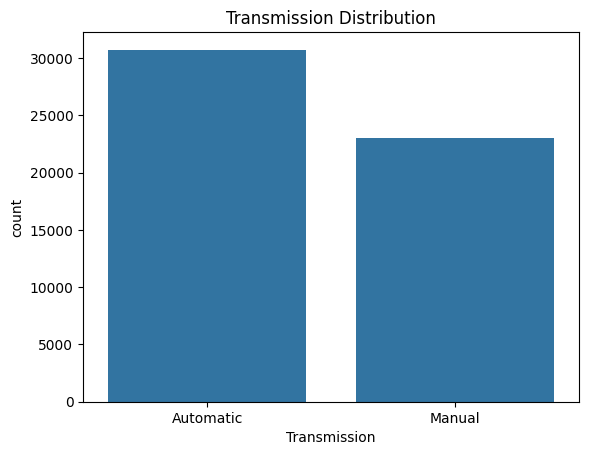

In [32]:
sns.countplot(x=ads_df['Transmission'])
plt.title('Transmission Distribution')
plt.show()

**c. Engine Type Distribution**

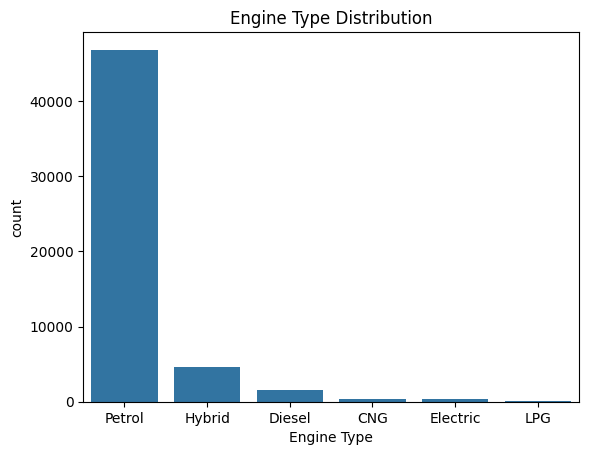

In [43]:
sns.countplot(x=ads_df['Engine Type'])
plt.title('Engine Type Distribution')
plt.show()

**d. Distribution of Mileage**

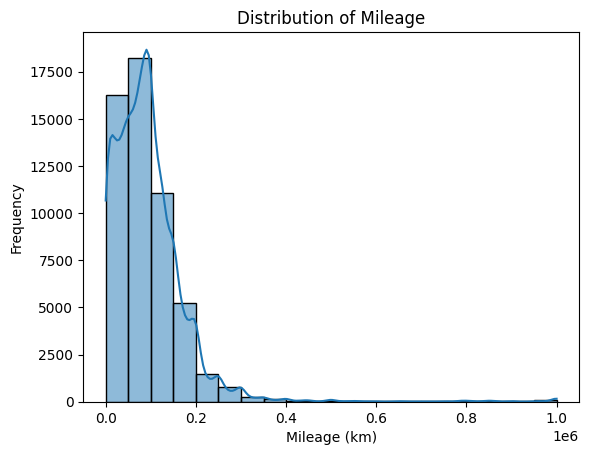

In [49]:
sns.histplot(ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int), kde=True, bins=20)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.show()

**e. Correlation between numerical features**

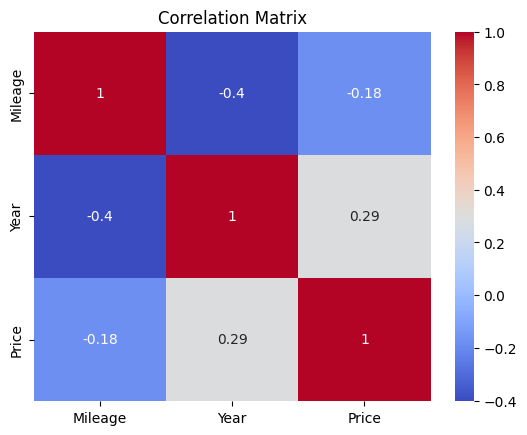

In [116]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

data = pd.DataFrame({
    'Year': ads_df.loc[units != 'price', 'Model'],
    'Price': value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x),
    'Mileage': ads_df.loc[units != 'price', 'Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)
})

numerical_cols = ['Mileage', 'Year', 'Price']  
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**f. Demand Analysis: Ad Frequency by Age Range**

*Categorizes vehicles based on their age and visualizes the frequency of ads in each category*

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/731153645.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_demand, x='Age Range', y='Ad Count', palette='viridis')


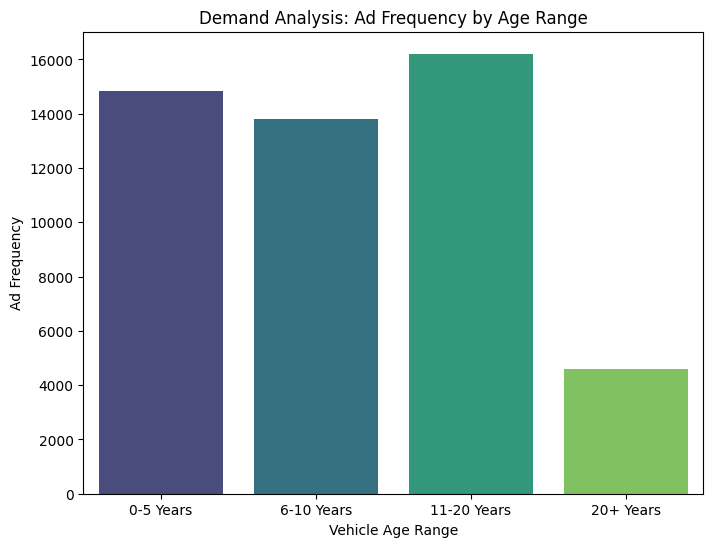

In [99]:
# Define age categories
ads_df['Age'] = 2024 - ads_df['Year']
ads_df['Model Category'] = pd.cut(ads_df['Age'], bins=[0, 5, 10, 20, 50], labels=['0-5 Years', '6-10 Years', '11-20 Years', '20+ Years'])

# Count the number of ads in each category
model_demand = ads_df['Model Category'].value_counts().reset_index()
model_demand.columns = ['Age Range', 'Ad Count']

plt.figure(figsize=(8, 6))
sns.barplot(data=model_demand, x='Age Range', y='Ad Count', palette='viridis')
plt.title('Demand Analysis: Ad Frequency by Age Range')
plt.xlabel('Vehicle Age Range')
plt.ylabel('Ad Frequency')
plt.show()

#### Feature Cleaning and Transformation

#####  **a. Convert Mileage to numeric (removing "km")**

In [501]:
ads_df['Mileage'] = ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)

##### **b. Extract year from Model (assuming it's a year)**

In [504]:
ads_df['Model'] = ads_df['Model'].astype(int)
ads_df.rename(columns={'Model': 'Year'}, inplace=True)

##### **c. Convert Price to numeric (removing "lacs, crore")**

*Removing Entries with 'Call for Price'*

In [506]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

ads_df = ads_df[units != 'price']

print(f"Number of rows after removal: {ads_df.shape[0]}")

Number of rows after removal: 53194


In [507]:
ads_df['Price'] = value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x)

*Displaying statistics to verify*

In [508]:
ads_df.describe()

,Featured,Year,Mileage,Price
count,53194.000000,53194.000000,53194.000000,5.319400e+04
mean,0.154266,2013.514682,95730.678911,4.182650e+06
std,0.361206,7.670105,87612.496904,6.301684e+06
min,0.000000,1951.000000,1.000000,1.250000e+05
25%,0.000000,2009.000000,42224.750000,1.650000e+06
50%,0.000000,2015.000000,85000.000000,2.890000e+06
75%,0.000000,2020.000000,125000.000000,4.550000e+06
max,1.000000,2024.000000,1000000.000000,3.375000e+08


##### **d. Extract city, province from Location**

In [509]:
# Load the list of city names from a JSON file
with open(os.path.join('json', 'pak_city_names.json'), 'r') as f:
    cities_list = loads(f.read())

# Define the list of provinces in Pakistan
provinces = ['KPK', 'Punjab', 'Sindh', 'Islamabad', 'Balochistan', 'Azad Kashmir']

# Function to retrieve city from input text
def retrieve_city(input):
    for city in cities_list:
        if city['name'].lower() in input.lower():
            return city['name']
    
    return ''

# Function to retrieve province from input text
def retrieve_province(input):
    for province in provinces:
        if province.lower() in input.lower():
            return province
    
    return ''

*Apply the retrieve_city, retrieve_city function to extract cities from the 'Location' column*

In [510]:
ads_df['Province'] = ads_df['Location'].apply(retrieve_province)
ads_df['City'] = ads_df['Location'].apply(retrieve_city)

*Display the first few rows to verify the new columns*

In [511]:
ads_df[['Location', 'Province', 'City']].sample(5)

,Location,Province,City
Ad Ref,,,
9281853,"Gulshan-e-Iqbal, Karachi Sindh",Sindh,Karachi
9328058,Sheikhupura Punjab,Punjab,
8972475,"Central Park Housing Scheme, Lahore Punjab",Punjab,Lahore
9267714,"Baldia Town, Karachi Sindh",Sindh,Karachi
9225163,"Manzoor Colony, Karachi Sindh",Sindh,Karachi


*Removing Entries with no matching*

In [512]:
ads_df = ads_df[ads_df['Province'] != '']
ads_df = ads_df[ads_df['City'] != '']

print(f"Number of rows after removal: {ads_df.shape[0]}")

Number of rows after removal: 50652


*Visualizing distribution of ads by province*

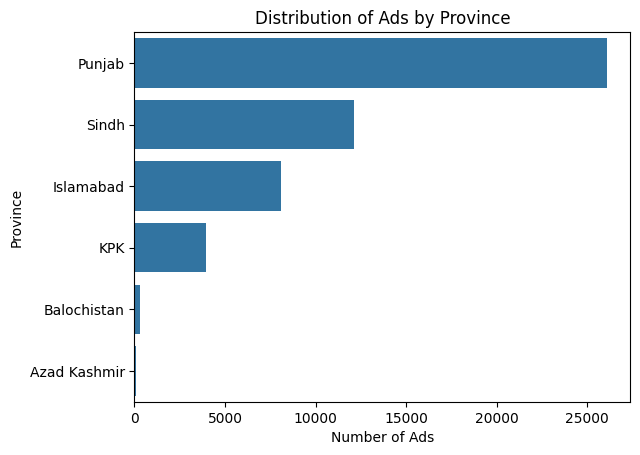

In [513]:
sns.barplot(y=ads_df['Province'].value_counts().index, x=ads_df['Province'].value_counts().values)
plt.title('Distribution of Ads by Province')
plt.xlabel('Number of Ads')
plt.ylabel('Province')
plt.show()

##### **e. Extracting individual features from 'Features' Column**

*Split the features into individual components (if stored as a list-like string)*

In [514]:
ads_df['Features'] = ads_df['Features'].apply(lambda x: eval(x) if isinstance(x, str) else x)

*Create a set of all unique features in the dataset*

In [515]:
unique_features = set()
ads_df['Features'].dropna().apply(lambda x: unique_features.update(x))
print(f"Total unique features: {len(unique_features)}")
print(unique_features)

Total unique features: 28
{'Keyless Entry', 'Power Locks', 'Sun Roof', 'Rear Seat Entertainment', 'Alloy Rims', 'USB and Auxillary Cable', 'Immobilizer Key', 'Cassette Player', 'Rear Speakers', 'ABS', 'AM/FM Radio', 'Cruise Control', 'CoolBox', 'Power Mirrors', 'Rear AC Vents', 'Air Conditioning', 'CD Player', 'Heated Seats', 'Steering Switches', 'DVD Player', 'Navigation System', 'Air Bags', 'Climate Control', 'Front Speakers', 'Power Windows', 'Front Camera', 'Rear Camera', 'Power Steering'}


*Create binary columns for each unique feature*

In [516]:
for feature in unique_features:
    ads_df[feature] = ads_df['Features'].apply(lambda x: 1 if isinstance(x, list) and feature in x else 0)

*Removing Entries with no features*

In [517]:
print(f"Number of rows without any features: {ads_df['Features'].isnull().sum()}")
ads_df['Features'].dropna(inplace=True)

Number of rows without any features: 0


In [518]:
all_features = [feature for features_list in ads_df['Features'] for feature in features_list]
feature_counts = Counter(all_features)

feature_counts_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

*Determining the top 10 features*

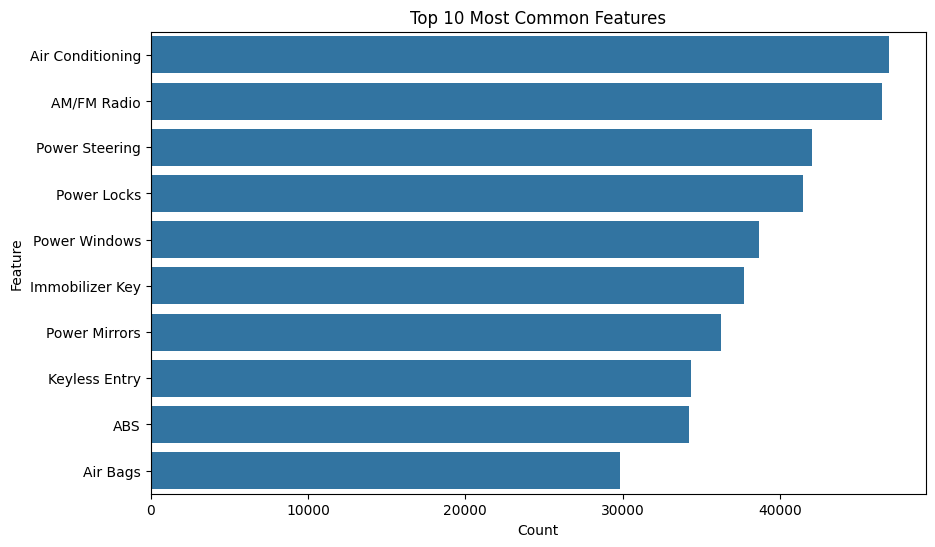

In [519]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_counts_df.head(10), x='Count', y='Feature')
plt.title('Top 10 Most Common Features')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.show()

##### **f. Extracting fine grained details from 'Details' Column**

*Ensure the 'Details' column is parsed as a dictionary*

In [520]:
ads_df['Details'] = ads_df['Details'].apply(eval) 

*Create new columns for each key in the dictionary*

In [521]:
details_keys = set().union(*(d.keys() for d in ads_df['Details'].dropna()))

for key in details_keys:
    ads_df[key] = ads_df['Details'].apply(lambda x: x.get(key) if isinstance(x, dict) else None)

*Verify the new columns*

In [522]:
ads_df[list(details_keys)].sample(1)

,Import Date,Last Updated:,Registered In,Battery Capacity,Auction Grade,Color,Body Type,Chassis No.,Engine Capacity,Assembly
Ad Ref,,,,,,,,,,
9317380,None,"Oct 15, 2024",Lahore,None,None,Grey,Sedan,None,1600 cc,Local


##### **g. Reforming Vehicle Type Distribution**

*Replace specific vehicle type values with unified categories*

In [523]:
ads_df['Vehicle Type'] = ads_df['Vehicle Type'].replace({
    'Micro Van': 'Van/Mini Van',
    'Mini Van': 'Van/Mini Van',
    'Van': 'Van/Mini Van',
    'Compact sedan': 'Sedan',
    'Compact SUV': 'SUV',
    'Compact hatchback': 'Wagon/Hatchback',
    'Station Wagon': 'Wagon/Hatchback',
    'Subcompact hatchback': 'Wagon/Hatchback',
    'Single Cabin': 'Truck',
    'Double Cabin': 'Truck',
    'Coupe': 'Coupe/Convertible',
    'Convertible': 'Coupe/Convertible',
    'Off-Road Vehicles': 'SUV'
})

ads_df['Vehicle Type'].value_counts()

Vehicle Type
Sedan                21057
Hatchback            19496
SUV                   4002
Crossover             2293
Van/Mini Van          1994
MPV                    582
Truck                  495
Pick Up                253
Wagon/Hatchback        195
Coupe/Convertible      125
Mini Vehicles          113
High Roof               47
Name: count, dtype: int64

*Visualize the updated distribution of Vehicle Types*

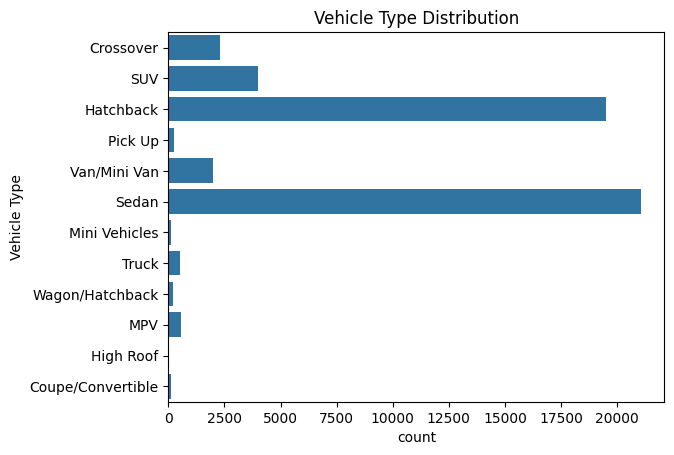

In [524]:
sns.countplot(y=ads_df['Vehicle Type'])
plt.title('Vehicle Type Distribution')
plt.show()

##### **h. Categorizing seller's status**

*Apply the function to the 'Seller Details' column and create a new 'Dealer' column*

In [525]:
def membership_status(details):
    if "Member Since" in details:
        return 1
    else:
        return 0

ads_df['Dealer'] = ads_df['Seller Details'].apply(membership_status)

*Visualize the distribution of dealers vs non-dealers*

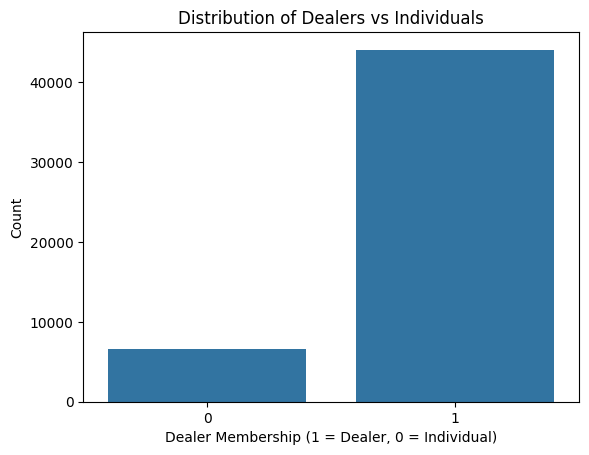

In [526]:
sns.countplot(data=ads_df, x='Dealer')
plt.title('Distribution of Dealers vs Individuals')
plt.xlabel('Dealer Membership (1 = Dealer, 0 = Individual)')
plt.ylabel('Count')
plt.show()

##### **i. Extracting Vehicle Make and Model**

In [527]:
# Load the make and model list from a JSON file
with open(os.path.join('json', 'make_model_list.json'), 'r') as f:
    make_model_list = loads(f.read())

# function to extract the make from the vehicle name
def extract_make(name):
    match = re.match(r'^\w+', name)
    return match.group(0)

# function to extract the model based on the make
def extract_model(vehicle_name, brand):
    models = next((item['models'] for item in make_model_list if item['make'].lower() == brand.lower()), [])
    for model in models:
        if re.search(r'\b' + re.escape(model) + r'\b', vehicle_name, re.IGNORECASE):
            return model
    return None

# Apply the functions to extract Make and Model
ads_df['Make'] = ads_df['Vehicle'].apply(extract_make)
ads_df['Model'] = ads_df.apply(lambda x: extract_model(x['Vehicle'], x['Make']), axis=1)

*Verify the new columns*

In [528]:
ads_df['Model'].dropna(inplace=True)
ads_df[['Vehicle', 'Make', 'Model']].sample(5)

,Vehicle,Make,Model
Ad Ref,,,
9286668,Lexus LX Series LX 600 Ultra Luxury 2022,Lexus,LX Series
9281660,Suzuki Cultus VXRi (CNG) 2008,Suzuki,Cultus
9257752,Suzuki Margalla GL 1995,Suzuki,Margalla
9220077,Suzuki Alto VXR 2023,Suzuki,Alto
9172904,Suzuki Mehran VXR Euro II 2015,Suzuki,Mehran


*Visualizing the distribution of manufacturers with most ads listings*

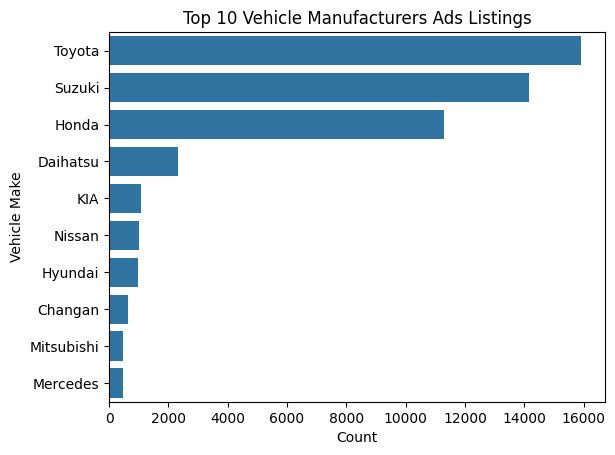

In [529]:
top_makes = ads_df['Make'].value_counts().head(10)
sns.barplot(y=top_makes.index, x=top_makes.values)
plt.title('Top 10 Vehicle Manufacturers Ads Listings')
plt.xlabel('Count')
plt.ylabel('Vehicle Make')
plt.show()

#### Feature Selection and Finalized Dataset

*Dropping unnecessary columns*

In [530]:
ads_df.drop(columns=[
    'url',
    'Location',
    'Features',
    'Details',
    'Seller Details',
    'Seller\'s Comments',
    'Last Updated:',
    'Auction Grade',
    'Body Type',
    'Chassis No.'
], axis=1, inplace=True)

In [531]:
ads_df = ads_df[['Make', 'Model', 'Vehicle', 'Year', 'Vehicle Type', 'Mileage',
       'Engine Type', 'Transmission', 'Price', 'City', 'Province',
       'Keyless Entry', 'Power Locks', 'Sun Roof', 'Rear Seat Entertainment',
       'Alloy Rims', 'USB and Auxillary Cable', 'Immobilizer Key',
       'Cassette Player', 'Rear Speakers', 'ABS', 'AM/FM Radio',
       'Cruise Control', 'CoolBox', 'Power Mirrors', 'Rear AC Vents',
       'Air Conditioning', 'CD Player', 'Heated Seats', 'Steering Switches',
       'DVD Player', 'Navigation System', 'Air Bags', 'Climate Control',
       'Front Speakers', 'Power Windows', 'Front Camera', 'Rear Camera',
       'Power Steering', 'Import Date', 'Registered In', 'Battery Capacity',
       'Color', 'Engine Capacity', 'Assembly', 'Dealer', 'Featured']]

ads_df.sample(3)

,Make,Model,Vehicle,Year,Vehicle Type,Mileage,Engine Type,Transmission,Price,City,...,Rear Camera,Power Steering,Import Date,Registered In,Battery Capacity,Color,Engine Capacity,Assembly,Dealer,Featured
Ad Ref,,,,,,,,,,,,,,,,,,,,,
9274774,Toyota,Yaris,Toyota Yaris GLI MT 1.3 2022,2022,Sedan,10000,Petrol,Manual,3980000.0,Sahiwal,...,0,1,None,Punjab,None,Super White,1300 cc,Local,1,0
9275584,Toyota,Aqua,Toyota Aqua L 2015,2015,Hatchback,130000,Hybrid,Automatic,4125000.0,Lahore,...,0,1,None,Punjab,None,White,1500 cc,Imported,0,0
9255177,Suzuki,Bolan,Suzuki Bolan VX Euro II 2017,2017,Van/Mini Van,31000,Petrol,Manual,1100000.0,Karachi,...,0,0,None,Karachi,None,Solid White,800 cc,Local,1,0


*Saving Processed Data*

In [532]:
# Save the cleaned and processed dataset to a new CSV file
ads_df.to_csv('cleaned datasets/dataset_1.csv')

### User Reviews Dataset

#### Loading the Dataset

In [56]:
reviews_df = pd.read_csv(os.path.join('datasets', 'dataset_2.csv'))

# Dropping duplicates if any
reviews_df.drop_duplicates()

# Displaying the first few rows to understand the structure of the data
reviews_df.head(3)

,make,model,car_model,review_title,reviewer_info,familiarity,review_text,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating,helpful_votes
0,Toyota,Corolla,Toyota Corolla 2.0D Saloon,Diesel Corrola,"Posted by Basharat on Jan 31, 2011",NaN,Most of the people runaway from diesel technol...,3 rating,2 rating,3 rating,5 rating,5 rating,4.0,(10 out of 15 people found this review helpful)
1,Honda,Civic,2016 Honda Civic Turbo 1.5 VTEC CVT,Adequate,"Posted by Awais Yousaf on Sep 27, 2016","Familiarity: I did not own this car, but have ...",This is a great looking car with a very nice i...,5 rating,4 rating,3 rating,4 rating,2 rating,3.0,(4 out of 4 people found this review helpful)
2,Hyundai,Tucson,2014 Hyundai Tucson,great if not ridden in pakistan,"Posted by Anonymous on Jul 26, 2017",Familiarity: I owned this car.,The exterior of the car is not great but its n...,3 rating,5 rating,5 rating,3 rating,3 rating,3.0,(1 out of 4 people found this review helpful)


#### Display basic information about the dataset

In [5]:
reviews_df.dtypes

make                object
model               object
car_model           object
review_title        object
reviewer_info       object
familiarity         object
review_text         object
style               object
comfort_rating      object
fuel_economy        object
perfomance          object
value_for_money     object
overall_rating     float64
helpful_votes       object
dtype: object

#### Check for missing values

In [6]:
reviews_df.isnull().sum()

make                 0
model                0
car_model            0
review_title         0
reviewer_info        0
familiarity        768
review_text          9
style                0
comfort_rating       0
fuel_economy         0
perfomance           0
value_for_money      0
overall_rating       9
helpful_votes        0
dtype: int64

#### Summary statistics of numerical columns

In [7]:
reviews_df.describe()

,overall_rating
count,4766.000000
mean,3.678976
std,1.050142
min,0.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


#### Check unique values for each column

In [8]:
for column in reviews_df.columns:
    print(f"{column}: {reviews_df[column].nunique()} unique values")

make: 47 unique values
model: 241 unique values
car_model: 1767 unique values
review_title: 3901 unique values
reviewer_info: 4457 unique values
familiarity: 4 unique values
review_text: 4713 unique values
style: 6 unique values
comfort_rating: 6 unique values
fuel_economy: 6 unique values
perfomance: 6 unique values
value_for_money: 6 unique values
overall_rating: 6 unique values
helpful_votes: 171 unique values


#### Feature Cleaning and Transformation

#####  **a. Clean Numerical Columns**

*Extract numeric values from columns like comfort_rating, fuel_economy, performance, value_for_money, and overall_rating by removing " rating" and casting them to integers.*

In [57]:
for column in ['style', 'comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money']:
    reviews_df[column] = reviews_df[column].str.replace('rating', '').str.strip().astype(int)

*Drop rows where 'overall_rating' is NaN*

In [58]:
reviews_df = reviews_df.dropna(subset=['overall_rating'])
reviews_df['overall_rating'] = reviews_df['overall_rating'].astype(int)

*Displaying statistics to verify*

In [59]:
reviews_df.describe()

,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating
count,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000
mean,4.059379,3.977549,3.925724,4.078682,3.966849,3.678976
std,1.197075,1.237792,1.222705,1.242775,1.313803,1.050142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#####  **b. Process helpful votes**

In [60]:
reviews_df['helpful_votes_ratio'] = reviews_df['helpful_votes'].str.extract(r'(\d+)\s+out\s+of\s+(\d+)').astype(float).apply(lambda x: x[0] / x[1], axis=1)
reviews_df['helpful_votes_ratio'].fillna(0, inplace=True)

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/4088841503.py:1: RuntimeWarning: invalid value encountered in scalar divide
  reviews_df['helpful_votes_ratio'] = reviews_df['helpful_votes'].str.extract(r'(\d+)\s+out\s+of\s+(\d+)').astype(float).apply(lambda x: x[0] / x[1], axis=1)


#####  **c. Extract date from reviewer info**

In [61]:
def extract_date(date_string):
    return datetime.strptime(date_string, "%b %d, %Y")

reviews_df['review_date'] = reviews_df['reviewer_info'].str.split(' on ').str[-1].str.strip().apply(extract_date)

#####  **d. Removing extra spaces from string columns**

In [62]:
reviews_df['review_title'] = reviews_df['review_title'].str.strip()
reviews_df['review_text'] = reviews_df['review_text'].str.strip()

#### Feature Selection and Finalized Dataset

*Dropping unnecessary columns*

In [63]:
reviews_df.drop(columns=[
    'reviewer_info',
    'helpful_votes',
    'familiarity'
], inplace=True)

In [64]:
reviews_df.head(3)

,make,model,car_model,review_title,review_text,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating,helpful_votes_ratio,review_date
0,Toyota,Corolla,Toyota Corolla 2.0D Saloon,Diesel Corrola,Most of the people runaway from diesel technol...,3,2,3,5,5,4,0.666667,2011-01-31
1,Honda,Civic,2016 Honda Civic Turbo 1.5 VTEC CVT,Adequate,This is a great looking car with a very nice i...,5,4,3,4,2,3,1.000000,2016-09-27
2,Hyundai,Tucson,2014 Hyundai Tucson,great if not ridden in pakistan,The exterior of the car is not great but its n...,3,5,5,3,3,3,0.250000,2017-07-26


*Saving Processed Data*

In [65]:
# Save the cleaned and processed dataset to a new CSV file
reviews_df.to_csv('cleaned datasets/dataset_2.csv', index=False)

#### EDA on key columns

**a. Distribution of Ratings**

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/3286417937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ratings, x='Rating Category', y='Rating', palette='muted', inner='quartile')


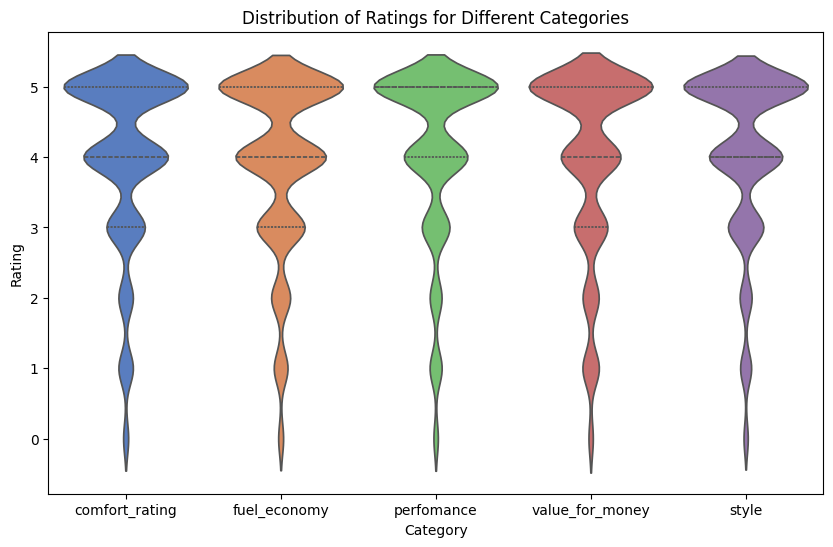

In [79]:
ratings = reviews_df.melt(value_vars=['comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money', 'style'], 
                          var_name='Rating Category', value_name='Rating')

# Plotting the violin plot for all categories
plt.figure(figsize=(10, 6))
sns.violinplot(data=ratings, x='Rating Category', y='Rating', palette='muted', inner='quartile')
plt.title('Distribution of Ratings for Different Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

**b. Review Trends Over Time**

*Analyze the number of reviews submitted each year*

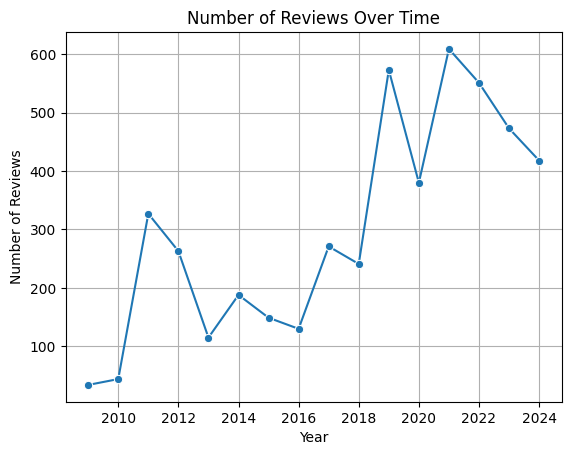

In [82]:
reviews_df['review_year'] = reviews_df['review_date'].dt.year

# Count the number of reviews per year
reviews_per_year = reviews_df['review_year'].value_counts().sort_index()

# Plot the number of reviews over time
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

**c. Sentiment Analysis Preparation**

*Conduct sentiment analysis using the Review Title/ Text column by visualizing the word frequency or performing text analysis.*

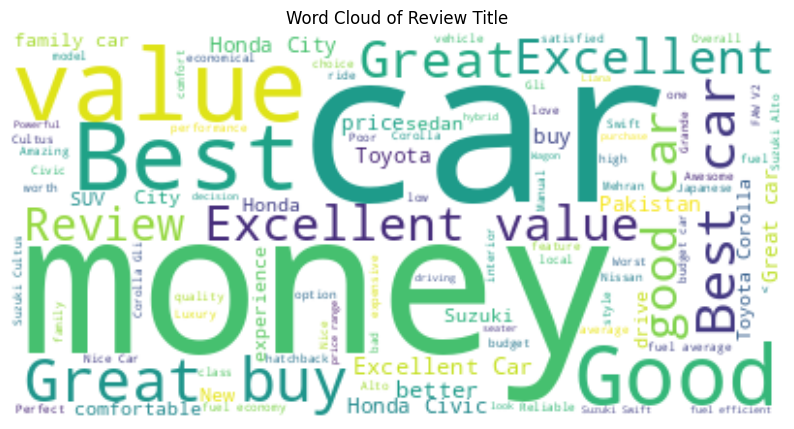

In [87]:
text = " ".join(review for review in reviews_df['review_title'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Review Title')
plt.show()

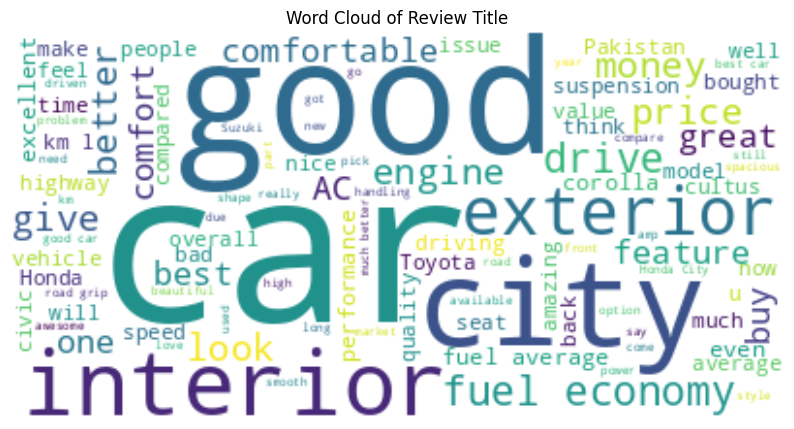

In [88]:
text = " ".join(review for review in reviews_df['review_text'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Review Title')
plt.show()

**d. Scatter Plots of Individual Ratings vs Overall Rating**

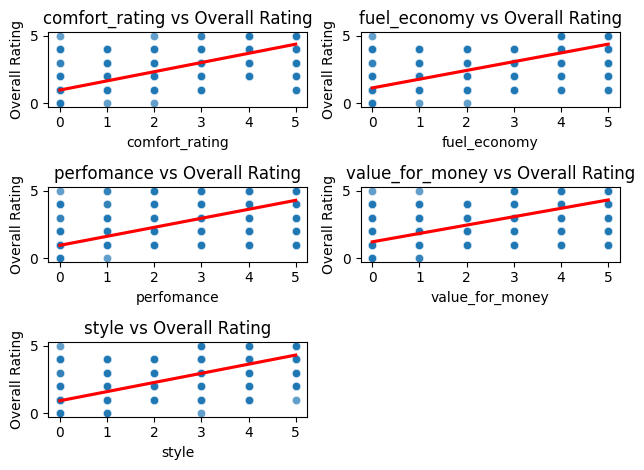

In [93]:
correlation_columns = ['comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money', 'style']

# Plot scatter plots for each column against 'overall_rating'
for i, col in enumerate(correlation_columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=reviews_df, x=col, y='overall_rating', alpha=0.7)
    sns.regplot(data=reviews_df, x=col, y='overall_rating', scatter=False, color='red', ci=None)  # Add regression line
    plt.title(f'{col} vs Overall Rating')
    plt.xlabel(col)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

**e. Manufacturers by Review Count**

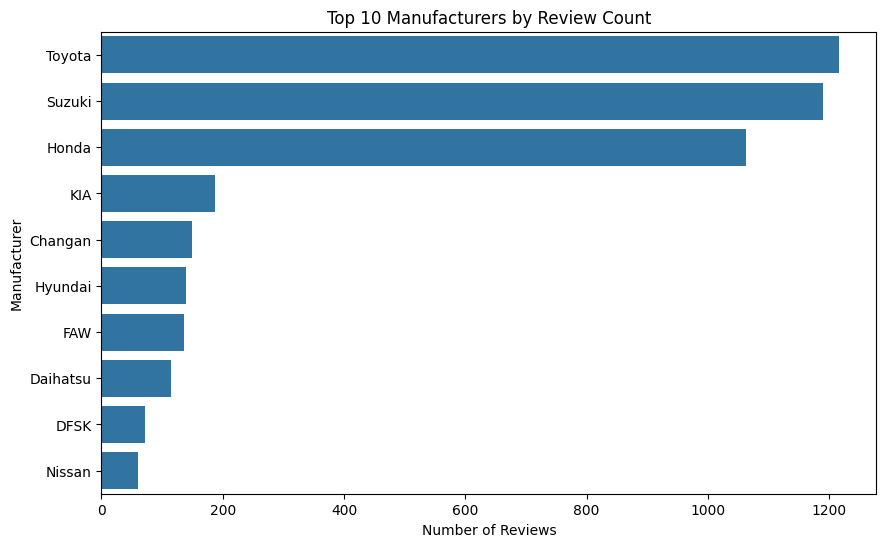

In [101]:
top_10_manufacturers = reviews_df['make'].value_counts().head(10).reset_index()
top_10_manufacturers.columns = ['Manufacturer', 'Review Count']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_manufacturers, x='Review Count', y='Manufacturer')
plt.title('Top 10 Manufacturers by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Manufacturer')
plt.show()